## Домашнее задание 2 (10 баллов)

## Часть 1

В первой части домашнего задания вы попрактикуетесь в работе с библиотекой numpy, которая позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки.

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [74]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [75]:
def result_mark(weights: np.array, marks: np.array) -> int:
    result1=np.round(weights@marks)
    return result1

In [76]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])
assert result_mark(weights, marks) == 8

In [77]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [78]:
def change_array(array: np.array, number: int) -> np.array:
    array[0::3]=number
    return array

In [79]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [80]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [81]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    result3=np.asarray(*np.where(np.absolute(array1-array2)<=precision))
    return result3

In [82]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)
assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [83]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [84]:
def block_matrix(block: np.array) -> np.array:
    result4=np.block([[block, block], [block, block]])
    return result4  

In [85]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [86]:
def diag_prod(matrix: np.array) -> int:
    a=np.diag(matrix)
    result5=np.prod(a[a!=0])
    return result5

In [87]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [88]:
def normalize(matrix: np.array) -> np.array:
    mean6=np.mean(matrix,axis = 0)
    std6=np.std(matrix,axis=0)
    result6= (matrix-mean6)/std6
    return result6

In [89]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [90]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

In [91]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### Задание 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [92]:
def antiderivative(coefs: np.array) -> np.array:
    result7=np.polyint(coefs)
    return result7

In [93]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [94]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### Задание 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [95]:
def make_symmetric(matrix: np.array) -> np.array:
    result8=np.triu(matrix) + np.tril(matrix.T, -1)
    return result8

In [96]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [97]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [98]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    result9= np.zeros((m, b-a+1))
    result9 += np.arange(a,b+1)
    return result9

In [99]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [100]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [101]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    result10 = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
    return result10 

In [102]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [103]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

* Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

* Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test, обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

* Посмотрите на матрицу корреляций факторов и целевой переменной. Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

* Если есть факторы, слабо коррелирующие с таргетом, удалите их.

* Попытайтесь сконструировать новые признаки.

* Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

**Ваша цель**: добиться наилучшего качества по метрике $r^2$ на кросс-валидации.

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%pylab inline


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\kzolo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt', 'number', 'array', 'matrix', 'block']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Загружаем данные

In [105]:
df=pd.read_csv("affairs.csv")
df.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [106]:
df.shape

(6366, 9)

In [107]:
df.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

Разделем параметры и целевую переменную

In [108]:
X_full=df[['rate_marriage','age','yrs_married','children','religious','educ','occupation','occupation_husb']]
y_full=df['affairs']


Обучим линейную регрессию, посмотрим на первоначальное качество на кросс-валидации.

In [109]:
from sklearn.model_selection import cross_val_score

model=LinearRegression()
print(cross_val_score(model,X_full,y_full,cv=5,scoring='r2'))
print(cross_val_score(model,X_full,y_full,cv=5,scoring='r2').mean())

[-0.22867743  0.0034017   0.          0.          0.        ]
-0.04505514528047823


Качество модели очень низкое.

Pазобъем данные на train и test, обучим алгоритм на train и сделаем предсказание на train и test, выведим ошибки.

In [110]:
from sklearn.model_selection import train_test_split

X = X_full

y = pd.DataFrame(y_full).copy() 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True)
model = LinearRegression()

model.fit(Xtrain, ytrain)


pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

#посмотрим коэфициенты
print(model.intercept_)
for a,b in zip(X.columns, *model.coef_):
    print(a,b)


[3.67031089]
rate_marriage -0.44473289391400544
age -0.012414450185329546
yrs_married -0.024348293298441306
children -0.0059368545071745325
religious -0.2559972608191587
educ -0.013139213879454683
occupation 0.07365353274570778
occupation_husb 0.009674466978164523


Сравним качество модели на обучающей выборке и тестовой. Переобучения нет, но качество модели очень плохое.

In [111]:
from sklearn.metrics import r2_score

print(r2_score(ytrain, pred_train))
print(r2_score(ytest, pred_test))

0.056979491119937276
0.02571329274114409


Коэффициент детерминации при кросс-валидации очень сильно различается для разных частей датасета. Попробуем перемешивать датасет с помощью ShuffleSplit.

In [112]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

model=LinearRegression()
print(cross_val_score(model,X_full,y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full,y_full,cv=cv,scoring='r2').mean())

[0.05845978 0.06712723 0.06688987 0.04759744 0.05964932]
0.05994472763553367


Коэффициент детерминации стал положительным, это хорошо. 

Теперь поработаем с параметрами. Составим таблицы корреляции признаков и целевой переменной.

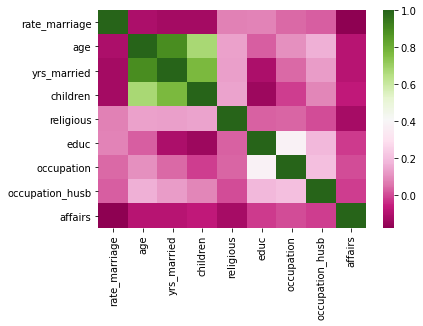

In [113]:
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [114]:
corr

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [115]:
df[df.columns[0:]].corr()['affairs'][:-1]

rate_marriage     -0.178068
age               -0.089964
yrs_married       -0.087737
children          -0.070278
religious         -0.125933
educ              -0.017740
occupation         0.004469
occupation_husb   -0.015614
Name: affairs, dtype: float64

Рассмотрим признаки, которые наименее коррелируют с целевой переменной, поробуем их удалить.
При удалении параметра "educ", который мало коррелирует с целевой переменной, модель практически не изменилась (чуть хуже). Оставим его в дальнейшем

In [116]:

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation','occupation_husb']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','occupation','occupation_husb']],y_full,cv=cv,scoring='r2').mean())

[0.0579973  0.06799812 0.06623508 0.04747108 0.06010708]
0.05996173228500092


При удалении параметра "occupation", который мало коррелирует с целевой переменной, модель стала чуть хуже, оставим его в дальнейшем

In [117]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','educ','occupation_husb']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','educ','occupation_husb']],y_full,cv=cv,scoring='r2').mean())

[0.05784991 0.06600266 0.06589516 0.046853   0.05959914]
0.05923997560585927


При удалении параметра "occupation_husb", который мало коррелирует с целевой переменной модель стала чуть лучше, удалим его.

In [118]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','educ','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','yrs_married','children','religious','educ','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.05968758 0.06713315 0.0668832  0.04778581 0.05996161]
0.06029026835791214


In [119]:
df = df.drop('occupation_husb', axis=1)

Можно отметить еще сильную корреляцию признаков 'age' и 'yrs_married', 'yrs_married' и 'children', поробуем удалить 'yrs_married. Лучше не стало, оставим как есть.

In [120]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full[['rate_marriage','age','children','religious','educ','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full[['rate_marriage','age','children','religious','educ','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.06007538 0.06689684 0.06691691 0.04730866 0.05948901]
0.060137359368315456


У нас есть несколько числовых признаков, которые по сути являются категориальными: 'religious', 'educ','occupation'. Сделаем для них  OneHot-кодированние ('occupation_husb' тоже категориальный, но мы его удалили, дальше с ним не работаем)

In [121]:
print(set(df.religious))
print(set(df.educ))
print(set(df.occupation))

{1.0, 2.0, 3.0, 4.0}
{9.0, 12.0, 14.0, 16.0, 17.0, 20.0}
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0}


In [122]:
df = pd.get_dummies(df, columns=['religious'], drop_first=True)

In [123]:
df = pd.get_dummies(df, columns=['educ'], drop_first=True)

In [124]:
df = pd.get_dummies(df, columns=['occupation'], drop_first=True)

In [125]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'affairs',
       'religious_2.0', 'religious_3.0', 'religious_4.0', 'educ_12.0',
       'educ_14.0', 'educ_16.0', 'educ_17.0', 'educ_20.0', 'occupation_2.0',
       'occupation_3.0', 'occupation_4.0', 'occupation_5.0', 'occupation_6.0'],
      dtype='object')

In [126]:
X_full.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0


In [127]:
X_full_OHC=df[['rate_marriage', 'age', 'yrs_married', 'children',
       'religious_2.0', 'religious_3.0', 'religious_4.0', 'educ_12.0',
       'educ_14.0', 'educ_16.0', 'educ_17.0', 'educ_20.0', 'occupation_2.0',
       'occupation_3.0', 'occupation_4.0', 'occupation_5.0', 'occupation_6.0']]

In [128]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full_OHC,y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full_OHC,y_full,cv=cv,scoring='r2').mean())


[0.04635521 0.07073119 0.06626422 0.05022197 0.05907143]
0.05852880407819165


Модель стала хуже

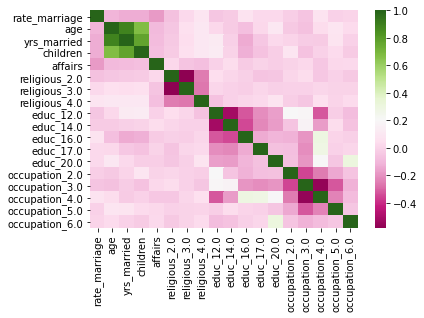

In [129]:
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [130]:
df[df.columns[0:]].corr()['affairs']#[:-1]

rate_marriage    -0.178068
age              -0.089964
yrs_married      -0.087737
children         -0.070278
affairs           1.000000
religious_2.0     0.020897
religious_3.0    -0.057029
religious_4.0    -0.071529
educ_12.0        -0.006770
educ_14.0         0.040070
educ_16.0        -0.030741
educ_17.0         0.000875
educ_20.0        -0.018529
occupation_2.0    0.002542
occupation_3.0    0.019951
occupation_4.0   -0.043153
occupation_5.0    0.018080
occupation_6.0    0.029290
Name: affairs, dtype: float64

Попробуем удалить признаки с малой корреляцией на целевую переменную:occupation_2.0,educ_17.0,educ_12.0

In [131]:
X_full_OHC=df[['rate_marriage', 'age', 'yrs_married', 'children',
       'religious_2.0', 'religious_3.0', 'religious_4.0',
       'educ_14.0', 'educ_16.0', 'educ_20.0',
       'occupation_3.0', 'occupation_4.0', 'occupation_5.0', 'occupation_6.0']]

In [132]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full_OHC,y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full_OHC,y_full,cv=cv,scoring='r2').mean())

[0.04861695 0.07064889 0.0664739  0.05028906 0.05961889]
0.05912953834445307


стало лучше (но качество модели очень плохое, применять нельзя)

Попробуем удалить признаки с малой корреляцией на целевую переменную:occupation_5.0,occupation_3.0,educ_20.0 

In [133]:
X_full_OHC=df[['rate_marriage', 'age', 'yrs_married', 'children',
       'religious_2.0', 'religious_3.0', 'religious_4.0',
       'educ_14.0', 'educ_16.0', 'educ_20.0', 'occupation_4.0', 'occupation_5.0', 'occupation_6.0']]

In [134]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full_OHC,y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full_OHC,y_full,cv=cv,scoring='r2').mean())

[0.04897008 0.070639   0.06690045 0.0506101  0.06022342]
0.059468608938507916


Улучшение только при удалении occupation_3.0

Поработаем теперь с наиболее коррелируемыми признаками с целевой переменной.

Попробуем добавить новый признак 'rate_marriage_NEW', который будет квадратом 'rate_marriage', и проверим качество модели заново

In [135]:
X_full_OHC['rate_marriage_NEW'] = X_full_OHC['rate_marriage'] ** 2

<ipython-input-135-99a490009b36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full_OHC['rate_marriage_NEW'] = X_full_OHC['rate_marriage'] ** 2


In [136]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model=LinearRegression()
print(cross_val_score(model,X_full_OHC[X_full_OHC.columns[1:]],y_full,cv=cv,scoring='r2'))
print(cross_val_score(model,X_full_OHC[X_full_OHC.columns[1:]],y_full,cv=cv,scoring='r2').mean())


[0.04799375 0.07149494 0.06549653 0.05076175 0.06123352]
0.059396099009636695


лучше не стало

In [137]:
X_full_OHC = X_full_OHC.drop('rate_marriage_NEW', axis=1)

Попробуем посмотреть графики зависимости

rate_marriage


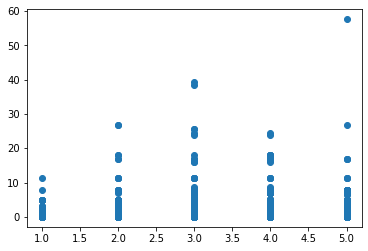

age


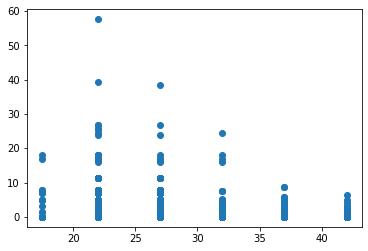

yrs_married


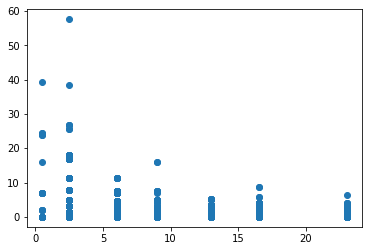

children


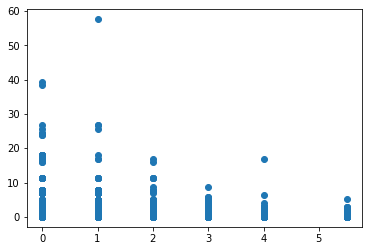

religious_2.0


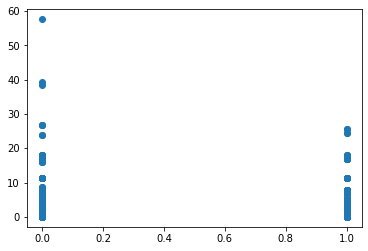

religious_3.0


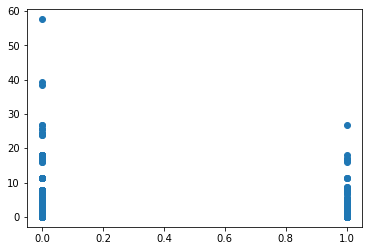

religious_4.0


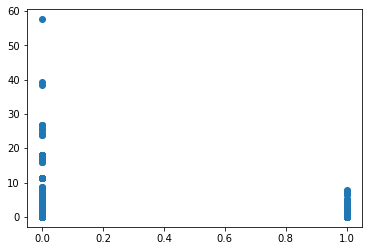

educ_12.0


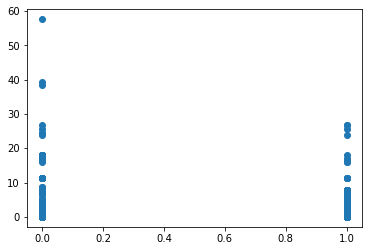

educ_14.0


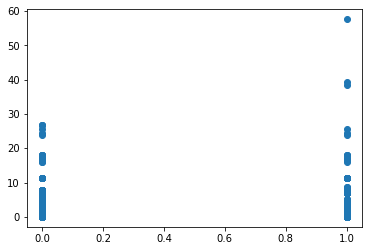

educ_16.0


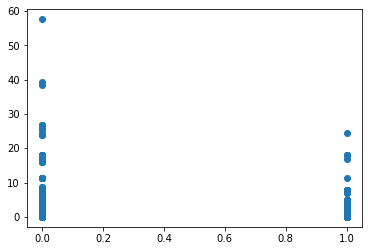

educ_17.0


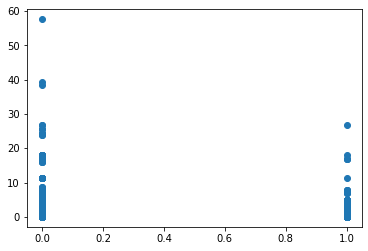

educ_20.0


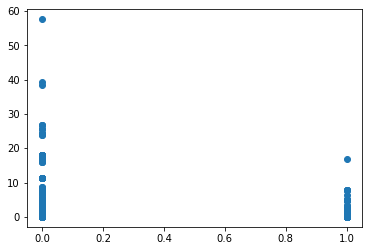

occupation_2.0


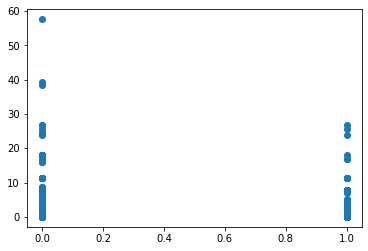

occupation_3.0


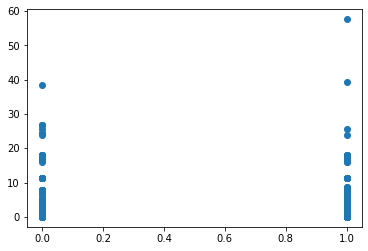

occupation_4.0


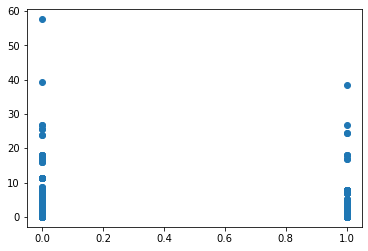

occupation_5.0


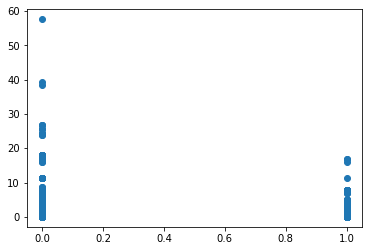

occupation_6.0


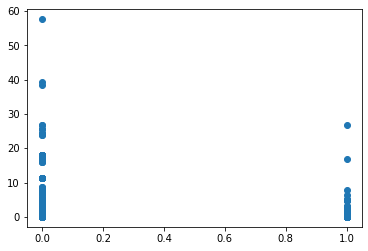

In [138]:
for c in df.columns:
    if c != 'affairs':
        print(c)
        scatter(df[c], df['affairs'])
        show()

По графикам зависимости тоже не видно. 

При OneHot-кодирование модель лучше не стала, попробуем масштабировать данные без нее. 

Попробуем масштабировать наши признаки перед обучением модели.

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(Xtrain)
X_test_scaled = scaler.transform(Xtest)
X_train_scaled = scaler.transform(Xtrain)

model = LinearRegression()

model.fit(X_train_scaled, ytrain)

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

Cравним качество модели на обучающей выборке и тестовой после масштабирования. 
Переобучения нет, но качество модели чуть лучше,но все равно очень плохое.

In [140]:
print(r2_score(ytrain, y_train_pred))
print(r2_score(ytest, y_pred))

0.056979491119937276
0.025713292741143978


In [141]:
X_train = pd.DataFrame(X_train_scaled, index=Xtrain.index, columns=Xtrain.columns)
X_test = pd.DataFrame(X_test_scaled, index=Xtest.index, columns=Xtest.columns)

In [142]:
model = LinearRegression()

model.fit(X_train, ytrain)

print(model.intercept_)
for a,b in zip(X.columns, *model.coef_):
    print(a,b)

[0.73842819]
rate_marriage -0.4312860373862075
age -0.08509372215002596
yrs_married -0.1773576267324106
children -0.008511675254120709
religious -0.22472682949778527
educ -0.02849480055671307
occupation 0.06913732222057992
occupation_husb 0.01300535348511379


In [143]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
    ])


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(cross_val_score(pipe,X_full[['rate_marriage','age','yrs_married','children','religious','educ','occupation']],y_full,cv=cv,scoring='r2'))
print(cross_val_score(pipe,X_full[['rate_marriage','age','yrs_married','children','religious','educ','occupation']],y_full,cv=cv,scoring='r2').mean())


[0.05968758 0.06713315 0.0668832  0.04778581 0.05996161]
0.06029026835791211


При обучении модели линейной регрессии, коэфициент детерминации очень далек от единицы. Скорее всего нужна другая модель, например классификация, сделаем пристрел))

In [144]:
y_full.head(10)

0    0.111111
1    3.230769
2    1.400000
3    0.727273
4    4.666666
5    4.666666
6    0.852174
7    1.826086
8    4.799999
9    1.333333
Name: affairs, dtype: float64

In [145]:
def map_y_full(affairs):
    if affairs > 0:
        return 1
    else:
        return 0
    
y_full_cl = pd.DataFrame(y_full.apply(map_y_full))

In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

cross_val_score(model, X_full, y_full_cl, cv=3).mean()

C:\Users\kzolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kzolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kzolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7235312598177819

Видно, что для классификации набор данных подходит лучше!